In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [2]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(perch_length,perch_weight,random_state=42)

test_array = np.array([1,2,3,4])
print(test_array.shape)

 #reshape로 2,2 행 2 열 2의 튜플로 변환 가능
test_array = test_array.reshape(2,2)
print(test_array.shape) #reshape로 2,2 행 2 열 2의 튜플로 변환 가능

train_input = train_input.reshape(-1,1) #-1은 전체 원소를 표현하는것
test_input = test_input.reshape(-1,1) #이렇게 변환하는 이유는 사이킷런에서 사용할 훈련세트는 2차원 배열이 되어야하므로
print(train_input.shape,test_input.shape)

(4,)
(2, 2)
(42, 1) (14, 1)


In [3]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input,train_target)

print(lr.predict([[50]]))
print(lr.coef_,lr.intercept_)
#기울기, y절편

[1241.83860323]
[39.01714496] -709.0186449535477


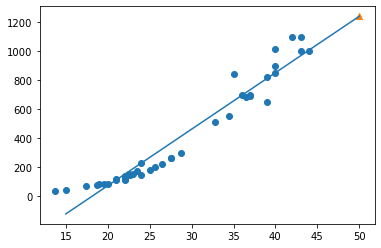

In [4]:
import matplotlib.pyplot as plt
plt.scatter(train_input, train_target)

# 15~50까지의 1차 방정식 그래프를 그린다.
plt.plot([15,50],[15 * lr.coef_ + lr.intercept_,50 * lr.coef_ +lr.intercept_])
plt.scatter(50,1241.8,marker='^')
plt.show()

In [5]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))
#전체적으로 과소적합이다. 모두 점수가 낮은편. -> 1차 직선방정식이 아닌 2차방정식을 사용하자!

0.939846333997604
0.8247503123313558


In [6]:
#2차 방정식을 위해선 train_input의 데이터에 원래 특성의 제곱값이 필요.
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
#브로드 캐스팅으로 해당 train,test_input의 모든 원소의 제곱을 시행

print(train_poly.shape)
print(test_poly.shape)

(42, 2)
(14, 2)


In [7]:
lr = LinearRegression()
lr.fit(train_poly,train_target)
print(lr.predict([[50**2, 50]]))
print(lr.coef_,lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278304


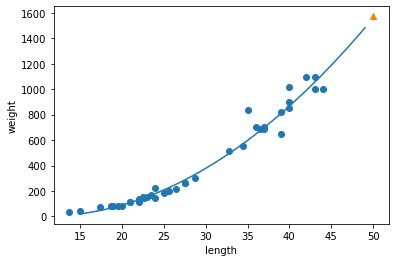

In [8]:
point = np.arange(15,50)

plt.scatter(train_input,train_target)
plt.plot(point, 1.01* point ** 2 - 21.6 * point + 116.05)

plt.scatter(50,1574,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [9]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))
#과소적합이 조금 남아있다.

0.9706807451768623
0.9775935108325122


In [10]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [11]:
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(perch_full,perch_weight,random_state=42)


In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly =PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [16]:
poly = PolynomialFeatures(include_bias=False)
train_poly = poly.fit_transform(train_input)
print(train_poly.shape)

(42, 9)


In [18]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [19]:
test_poly = poly.transform(test_input)

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly,train_target)
print('TrainScore : ' ,lr.score(train_poly,train_target))
print('TestScore : ' ,lr.score(test_poly,test_target))

TrainScore :  0.9903183436982124
TestScore :  0.9714559911594203


In [23]:
poly = PolynomialFeatures(degree = 5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)
#5차수로 특성이 55개나 생긴다.

(42, 55)


In [24]:
lr.fit(train_poly,train_target)
print('TrainScore : ' ,lr.score(train_poly,train_target))
print('TestScore : ' ,lr.score(test_poly,test_target))
#특성이 너무 많아 엄청난 과대적합이 일어난다.
#과대적합 해결 -> 규제라는 기능을 사용

TrainScore :  0.999999999997515
TestScore :  -144.40196592191958


In [25]:
#규제란, 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지못하도록 훼방하는 것을 말한다.
#선형 회귀 모델의 경우 특성에 곱해지는 계수의크기를 작게 만들어 시행


#규제를 하기 이전에, 각 특성들간의 값들을 정규화해줘 모든 특성이 공정하게 제어되도록 해주기 위해 StandaraScaler라는 것을 import해준다.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)#훈련 특성을 맞춰준다.
train_scaled = ss.transform(train_poly) #정규화된 특성으로 반환
test_scaled = ss.transform(test_poly)

In [27]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9896101671037343
0.9790693977615398


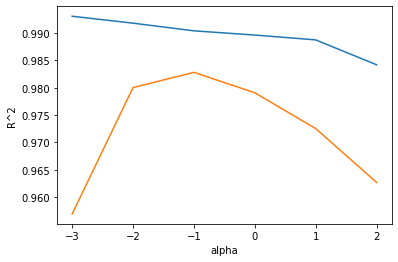

In [28]:
import matplotlib.pyplot as plt
train_score = []
test_score = []


alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    #릿지 모델 생성
    ridge = Ridge(alpha= alpha)
    #릿지 모델 훈련
    ridge.fit(train_scaled,train_target)
    #훈련 점수와 테스트 점수 저장
    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled,test_target))

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
#그래프를 분석해보면 -1일때, 가장 test와 train의 점수가 근접하기때문에 가장 적절한 하이퍼 파라미터는 -1 즉 10^-1 = 0.1이다.

In [29]:
ridge = Ridge(alpha=0.1)#최적의 하이퍼파라미터를 찾았다.
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))
#훈련,테스트간의 과소적합도 없고 정확도도 높다.

0.9903815817570362
0.9827976465386904


In [40]:
#이번엔 라쏘 회귀를 실험해보자.
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

0.989789897208096
0.9800593698421886


In [45]:
import matplotlib.pyplot as plt
train_score = []
test_score = []


alpha_list = [0.001,0.01,0.1,1,10,100]

for alpha in alpha_list:
    lasso = Lasso(alpha = alpha, max_iter=10000)
    lasso.fit(train_scaled,train_target)
    train_score.append(lasso.score(train_scaled,train_target))
    test_score.append(lasso.score(test_scaled,test_target))

C:\Users\kangh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.69795779601, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Users\kangh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345409666, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


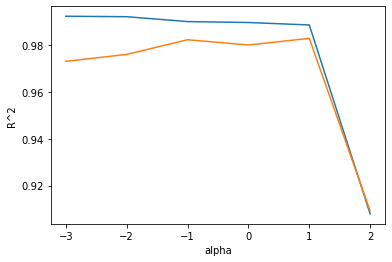

In [46]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
#그래프 분석 결과 최적의 값은 1, 2는 너무 점수가 떨어진다.

In [47]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

0.9888067471131867
0.9824470598706695


In [48]:
print(np.sum(lasso.coef_ == 0)) #사용한 특성은 15개라는 것을 반증
#머신러닝 흐름도 -> 모델 선정 -> 특성 선정 -> 선정한 특성으로 훈련 -> 테스트로 점수 확인
#고급 과소적합이라면 특성을 늘려주는 PolynomialFeatures로 존재하는 특성으로 새로운 특성들을 생성 가능 기본 차수 degree는 2이다.
#만약 과대적합이라면 특성의 계수나 기울기를 조절해주는 Ridge나 Lasso를 이용해 과대적합을 줄여준다.
#이들의 최적의 하이퍼 파라미터 값 alpha를 찾기 위해서는 for문을 이용해 train과 test에 대한 그래프를 그려봐 서로의 차이가 가장 적으며 점수도 높은것을 선정해주면 된다.
#또한, 규제를 하기 이전에, 각 특성들간의 값들을 정규화해줘 모든 특성이 공정하게 제어되도록 해주기 위해 StandaraScaler라는 것을 import해준다.

'''
아래가 모든 특성들간의 정규화를 진행한 예시이다. 여기선 StandardScaler를 사용했다.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)#특성들을 모델에 훈련시켜줘야 transform으로 정규환 된 값으로 변환해줄수있다.
train_scaled = ss.transform(train_poly) #정규화된 특성으로 반환
test_scaled = ss.transform(test_poly)
'''


40
